In [10]:
# Import every single library that has been imported during labs because who knows what will be required... 
# This course feels like a bloody badly structured mess
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm

In [11]:
# load the Boston housing dataset in the notebook as pandas dataframe
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [13]:
# Check that it has been imported and has following variables:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


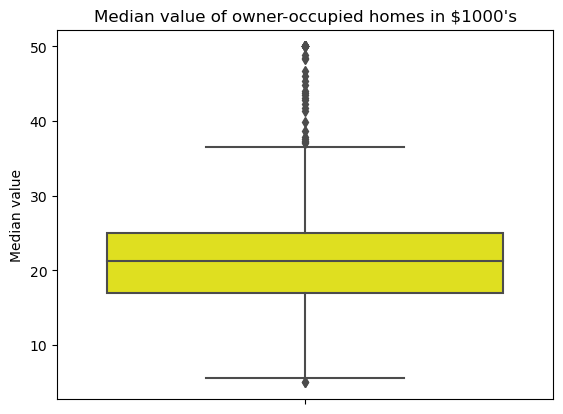

In [30]:
# For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y="MEDV", data=boston_df, color="yellow").set(ylabel="Median value", title="Median value of owner-occupied homes in $1000's")
plt.show()

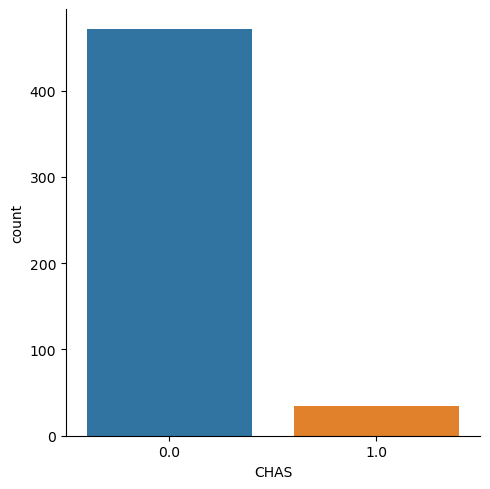

In [34]:
# Provide a  bar plot for the Charles river variable
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.show()

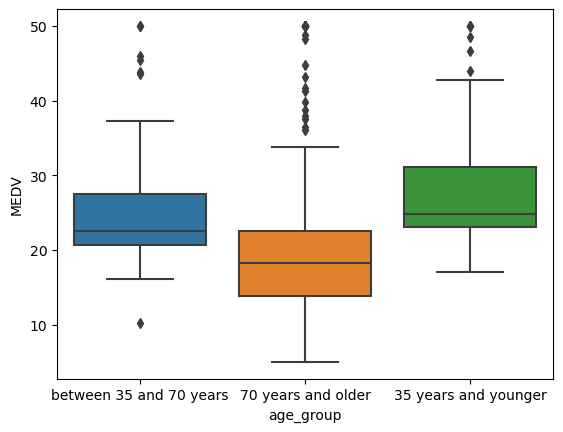

In [28]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# 1. Discretize the age
boston_df.loc[(boston_df["AGE"] <= 35), "age_group"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35)&(boston_df["AGE"] < 70), "age_group"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "age_group"] = "70 years and older"

# 2. Boxplot MEDV variable vs the AGE variable
ax=sns.boxplot(x="age_group", y="MEDV", data=boston_df)
plt.show()

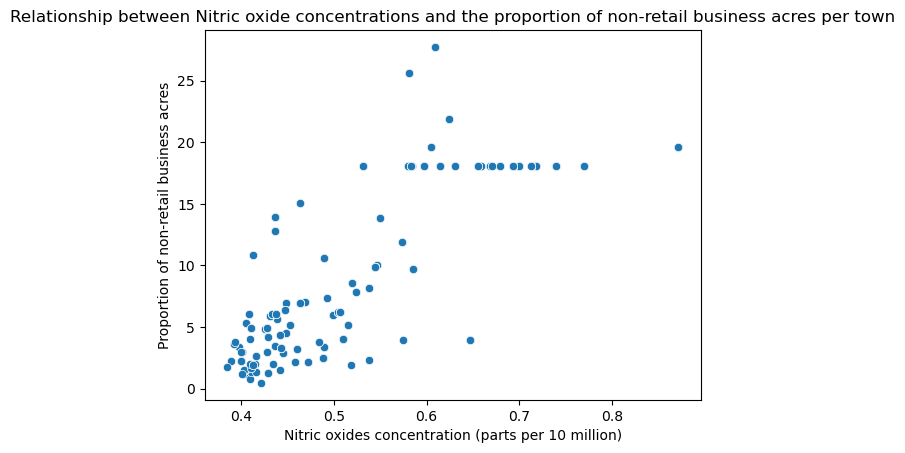

In [35]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
# the proportion of non-retail business acres per town. What can you say about the relationship?
ax=sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set(xlabel="Nitric oxides concentration (parts per 10 million)", ylabel="Proportion of non-retail business acres", 
                                                           title="Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.show()
# CONCLUSION ABOUT THE RELATIONSHIP - except for weird "straight line" of dots at about 18%
# there seems to be an upward sloaping linear relationship - the higher the nitric oxide concentration
# the higher proportion of none-retail business acres

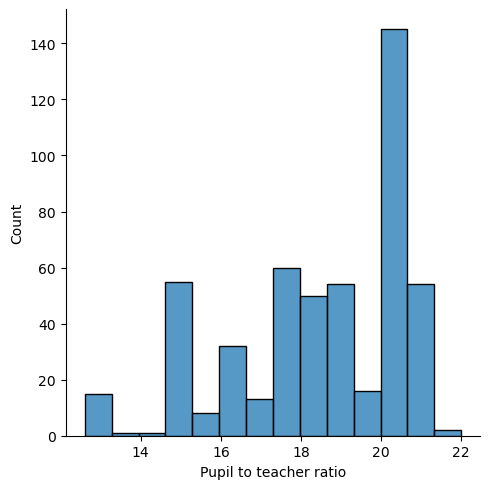

In [46]:
# Create a histogram for the pupil to teacher ratio variable
sns.displot(boston_df["PTRATIO"], kde=False).set(xlabel="Pupil to teacher ratio")
plt.show()

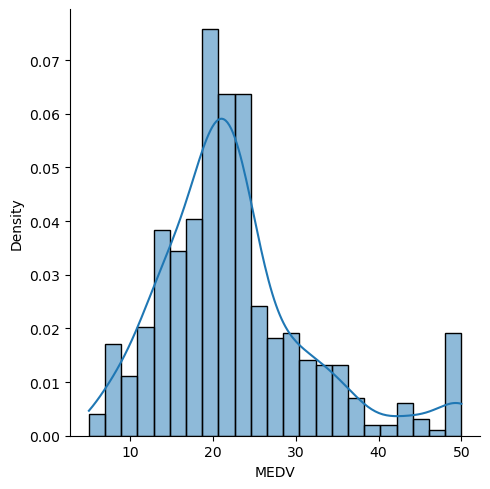

In [48]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
# (T-test for independent samples)
# α = 0.05
# Null hypothesis - There is NO difference in median value of houses
# Alternative hypothesis - There is difference in median value of houses

# Plot to check the distribution
sns.displot(boston_df["MEDV"], stat="density", kde=True)
plt.show() #CONCLUSION - the distribution seems to be normal-ish but let's assume it is normal and proceed with the test
# Continuation below the histogram

In [54]:
# (T-test for independent samples)
# Levene's Test for variance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
# Returned pvalue=0.003238119367639829 which is lower than 0.05 so we cannot assume homogeneity of variance (according to week 5)
# But let's proceed anyways and set the equal variance parameter in T test to False
# Continuation with the T-test itself in the row below

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [58]:
# (T-test for independent samples)
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

# FINAL CONCLUSION - Since the p-value is less than alpha value 0.05, 
# we reject the null hypothesis as there is enough proof that there is a statistical difference
# in median value of houses dpending on whether they are bound by the river or not

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

In [ ]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
# (ANOVA)

# AGE - proportion of owner-occupied units built prior to 1940
# MEDV - Median value of owner-occupied homes in $1000's

#Huh? which proportion? I'll assume it is the age groups we already created for the boxplot earlier
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# α = 0.05
# Null hypothesis - the three population menas are equal
# Alternative hypothesis - at least one of the means differs

In [59]:
# Test for equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# p-value=0.06295337343259205 > 0.05, equality of variance = true = let's proceed  


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [82]:
#ANOVA itself
# f_statistic, p_value = scipy.stats.f_oneway()
# print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
young = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'].to_numpy()
middle = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'].to_numpy()
old = boston_df[boston_df['age_group'] == '70 years and older']['MEDV'].to_numpy()

#to_numpy() in the end to transform to array. Did not want to work otherwise if doing exactly as in lab samples

f_statistic, p_value = scipy.stats.f_oneway(young, middle, old)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# CONCLUSION P-Value: 1.7105011022702984e-15 is lower than 0,05, we reject null hypothesis. Aat least one of the means differs 

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [83]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of 
# non-retail business acres per town? 
# (Pearson Correlation)
# α = 0.05
# Null hypothesis - there is no relationship
# Alternative hypothesis - there is a relationship
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
# CONCLUSION pvalue=7.913361061240043e-98 is lower than 0,05, we reject null hypothesis. 
# A relationship between NOX and INDUS exists 

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061240043e-98)

In [84]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on 
# the median value of owner occupied homes? 
# (Regression analysis)

# DIS - weighted distances to five Boston employment centres
# MEDV - Median value of owner-occupied homes in $1000's

# α = 0.05
# Null hypothesis - distance to the employment centers has no effect on median value
# Alternative hypothesis - distance to the employment centers has effect on median value

X = boston_df['DIS']
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

#CONCLUSION - P value of 1.21 * 10 raised to power negative 8, which is less than 0.05. 
# Reject null hypothesis that there is no association

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.21e-08
Time:                        10:46:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""